### Visão Geral
Este projeto tem como objetivo analisar dados e desenvolver um modelo de ML para prever os valores de imóveis para aluguel em uma plataforma imobiliária. A ideia é auxiliar NOVOS proprietários a colocar seus imóveis disponíveis para aluguel com um preço competitivo no mercado, utilizando base de dados do Airbnb entre abril de 2018 e abril de 2020.

Para realizar essa previsão, a variável que será estimada é a ‘price’ (preço) dos imóveis. O uso de algoritmos de regressão em machine learning, que utilizarão as características do imóvel, localização e outras informações relevantes disponíveis.


link explicação das variaveis: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

link fonte de dados: http://insideairbnb.com/explore

#### Importação bibliotecas e dados

In [63]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [64]:
meses = {'jan':1, 'fev':2, 'mar':3, 'abr':4 , 'mai':5, 'jun':6, 'jul':7, 'ago':8, 'set':9, 'out':10, 'nov':11, 'dez':12}

caminho_base = pathlib.Path('dataset')
base_airbnb = pd.DataFrame()

for arquivo in caminho_base.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    
    df = pd.read_csv(caminho_base / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)


In [65]:
print(list(base_airbnb.columns))
base_airbnb.head(3)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,ano,mes,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,NaN,Everything is there. METRO is 5 min walk. Dir...,NaN,NaN,strictly no smoking in the apartment ! We want...,NaN,NaN,https://a0.muscache.com/im/pictures/66421/ae9b...,NaN,53598,https://www.airbnb.com/users/show/53598,Shalev,2009-11-12,FL,"Hello , my name is Shalev , I am an orchestra ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/53598/profile...,https://a0.muscache.com/im/users/53598/profile...,Botafogo,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Rio de Janeiro, RJ, Brazil",Botafogo,Botafogo,NaN,Rio de Janeiro,RJ,22250-040,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.946854,-43.182737,t,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Air conditioning"",Kitchen,Doorma...",NaN,$133.00,$823.00,"$2,698.00","$1,025.00",$102.00,2,$34.00,60,365,7 weeks ago,t,28,58,88,363,2018-04-14,38,2010-01-03,2018-03-04,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.38,2018,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I used to work as a journalist all around the ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050

In [66]:
# Verificar o tamanho da base de dados
print(f'Entradas: {base_airbnb.shape[0]}')
print(f'Variaveis: {base_airbnb.shape[1]}')

Entradas: 902210
Variaveis: 108


Devido a grande quantidade de variaveis o modelo pode ficar lento se todas as colunas forem utilizadas.

Alem disso, uma análise preliminar permite ver que algumas variaveis nao sao relevantes para um modelo de previsao de preço.


    - ID's
    -Links 
    -Pictures 
    - Urls
    Informaçoes nao relevantes para o modelo.
    Colunas repetidas ou extremamente parecidas com outra . 
<br>
Para otimizar o modelo será utilizando uma amostra dos dados para analise variavel por variavel, exportando para o excel. Será análisado o tipo da variavel e se a informaçao que ela traz é relevante para o modelo, tendo em vista que será uma predição de preço, portanto dados relevantes para isso apenas.

In [67]:
base_airbnb.head(500).to_csv('amostra_dados.csv', sep=';')

#### Depois da análise das variaveis, levando em conta os critérios explicados acima, ficamos com as seguintes colunas:

In [68]:
colunas = ['host_id','host_name','host_since','host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes', 'neighbourhood']

base_airbnb = base_airbnb.loc[:, colunas]
print(list(base_airbnb.columns))
base_airbnb.head()

['host_id', 'host_name', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes', 'neighbourhood']


,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
0,53598,Shalev,2009-11-12,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,"{TV,Internet,""Air conditioning"",Kitchen,Doorma...",$133.00,"$1,025.00",$102.00,2,$34.00,60,38,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4,Botafogo
1,68997,Matthias,2010-01-08,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$270.00,$0.00,$273.00,2,$51.00,4,205,93.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4,Copacabana
2,99249,Goya,2010-03-26,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",$222.00,$851.00,$211.00,2,$215.00,3,85,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4,Ipanema
3,102840,Viviane,2010-04-03,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$161.00,"$1,000.00",$220.00,2,$45.00,4,208,94.0,9.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4,Copacabana
4,135635,Renata,2010-05-31,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$222.00,NaN,$85.00,2,$68.00,2,200,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4,Ipanema


- Verificar a estrutura dos dados 
        
        - Tamanho atual da base
        - Ausencia de dados na base
        - Tipo dos dados disponiveis

In [69]:
base_airbnb.shape

(902210, 37)

In [70]:
base_airbnb.isnull().sum()

host_id                             0
host_name                         460
host_since                        460
host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_score

- Grande quantidade de valores ausentes em algumas variaveis. É preciso verificar o tamanho dessa ausencia em relaçao ao dataset e assim tomar a melhor decisao possivel , qual o tratamento será feito, dependendo da importancia dessas informaçoes para o modelo e em relaçao ao dados de forma geral . 

In [71]:
((base_airbnb.isnull().sum() / base_airbnb.shape[0]) *100).sort_values(ascending=False)     # em %

review_scores_checkin          49.727890
review_scores_accuracy         49.720797
review_scores_location         49.717139
review_scores_value            49.716917
review_scores_communication    49.701843
review_scores_cleanliness      49.701622
review_scores_rating           49.657619
security_deposit               46.694229
host_response_rate             44.540185
host_response_time             44.539852
cleaning_fee                   34.748673
neighbourhood                   6.437193
beds                            0.277319
bathrooms                       0.191086
bedrooms                        0.094213
host_name                       0.050986
host_since                      0.050986
host_is_superhost               0.050986
host_listings_count             0.050986
longitude                       0.000000
mes                             0.000000
ano                             0.000000
cancellation_policy             0.000000
is_business_travel_ready        0.000000
instant_bookable

In [72]:
base_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902210 entries, 0 to 34328
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   host_id                      902210 non-null  int64  
 1   host_name                    901750 non-null  object 
 2   host_since                   901750 non-null  object 
 3   host_response_time           500367 non-null  object 
 4   host_response_rate           500364 non-null  object 
 5   host_is_superhost            901750 non-null  object 
 6   host_listings_count          901750 non-null  float64
 7   latitude                     902210 non-null  float64
 8   longitude                    902210 non-null  float64
 9   property_type                902210 non-null  object 
 10  room_type                    902210 non-null  object 
 11  accommodates                 902210 non-null  int64  
 12  bathrooms                    900486 non-null  float64
 13  

- Verificar a correlaçao dessas variaveis com grande volume de dados ausentes em relaçao a variavel target . Mas primeiro alterar o tipo de algumas  .

        - price
        - extra_people
        - security_deposit

In [73]:
#price
base_airbnb['price'] = base_airbnb['price'].astype(str).str.replace('$', '') # Removendo sifrao .
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '') # Removendo separador de milhar ',' .
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False) # Alterando o tipo para float

#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(str).str.replace('$', '')   # Removendo sifrao .
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')   # Removendo separador de milhar ',' .
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32)   # Alterando o tipo para float

#security_deposit
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].astype(str).str.replace('$', '')   # Removendo sifrao .
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].str.replace(',', '')   # Removendo separador de milhar ',' .
base_airbnb['security_deposit'] = base_airbnb['security_deposit'].astype(np.float32)   # Alterando o tipo para float

#### Correlaçao entre as variaveis com valores falantes

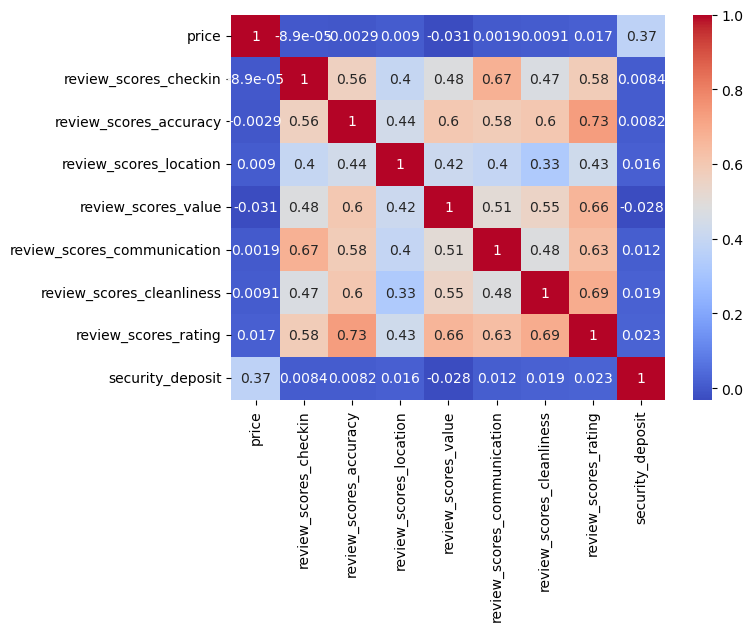

In [74]:
correlacao = base_airbnb[['price', 'review_scores_checkin', 'review_scores_accuracy', 'review_scores_location',
                          'review_scores_value', 'review_scores_communication', 'review_scores_cleanliness',
                          'review_scores_rating', 'security_deposit']].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()

- Coeficiente de variação

Os coeficientes de variação permitem avaliar a relação entre as variáveis independentes e a variável alvo 'preço', identificando se há uma relação forte (próxima de 1 ou -1) ou fraca (próxima de 0) entre elas. Isso auxilia na compreensão do impacto das variáveis independentes na variável alvo.

In [75]:
correlacao_valores = correlacao['price'].drop('price')
print(correlacao_valores)

review_scores_checkin         -0.000089
review_scores_accuracy        -0.002856
review_scores_location         0.009024
review_scores_value           -0.030642
review_scores_communication    0.001856
review_scores_cleanliness      0.009104
review_scores_rating           0.016593
security_deposit               0.373782
Name: price, dtype: float64


- Distribuição

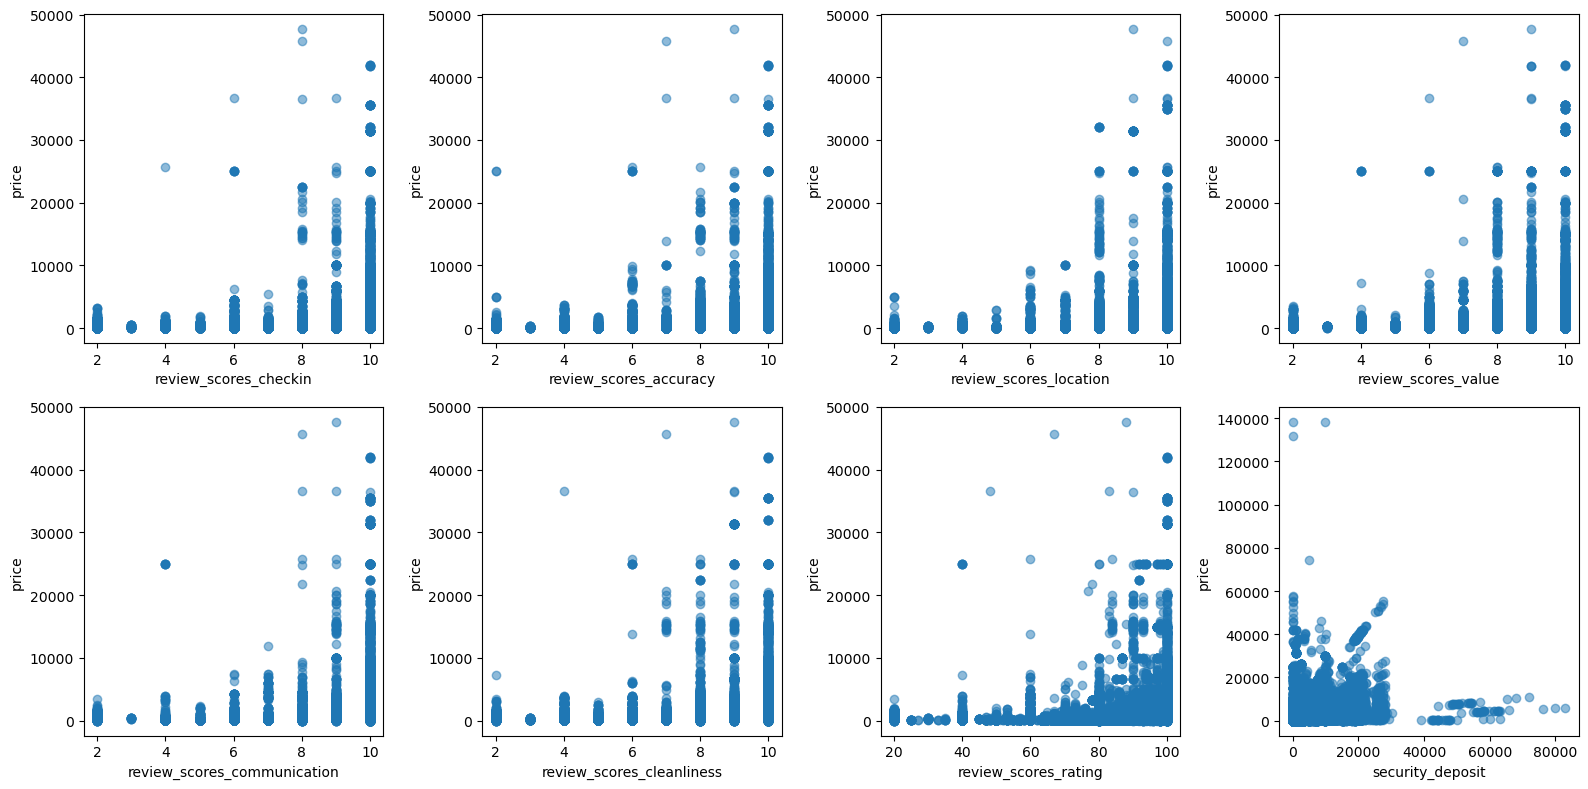

In [76]:
variaveis = ['review_scores_checkin', 'review_scores_accuracy', 'review_scores_location', 'review_scores_value', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating','security_deposit']
target_var = 'price'

# Cria uma matriz de subplots com o número de linhas e colunas adequado
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Itera sobre as variáveis e cria um gráfico de dispersão para cada uma
for i, var in enumerate(variaveis):
    axes[i].scatter(base_airbnb[var], base_airbnb[target_var], alpha=0.5)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target_var)

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()

A falta de relação pode indicar que essas variáveis não possuem uma influência direta ou linear sobre o preço. Existem diferentes razões pelas quais isso pode acontecer. Por exemplo, outras variáveis não incluídas na análise podem desempenhar um papel mais significativo na motivação do preço. 

É importante lembrar que a falta de correlação linear não significa necessariamente que as variáveis não têm impacto no preço. Outros tipos de relações ou padrões podem estar presentes, como correlações não lineares ou dependências condicionais.

Porem, devido a grande quantidade de valores ausentes dessas variaveis e visto que elas nao tem consideravel relaçao com o target, elas serao excluidas. 

        - Variavel security_deposit será mantida, apesar de muitos valores ausentes, será tratada com sua media. Para o modelo  de negocio acredito ser um fator importante .  Depositos de segurança sao bastante comuns em alugueis de imovel .

In [77]:
colunas=['review_scores_checkin', 'review_scores_accuracy', 'review_scores_location', 'review_scores_value', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating','host_response_rate','cleaning_fee','host_response_time' ]
base_airbnb = base_airbnb.drop(colunas, axis=1) #Drop das colunas

base_airbnb['security_deposit'] = base_airbnb['security_deposit'].fillna(base_airbnb['security_deposit'].mean())
base_airbnb = base_airbnb.dropna()  

In [78]:
base_airbnb.isnull().sum()

host_id                     0
host_name                   0
host_since                  0
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
security_deposit            0
guests_included             0
extra_people                0
minimum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
neighbourhood               0
dtype: int64

In [79]:
print(base_airbnb.dtypes)
base_airbnb.iloc[0]

host_id                       int64
host_name                    object
host_since                   object
host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
security_deposit            float32
guests_included               int64
extra_people                float32
minimum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
neighbourhood                object
dtype: object


host_id                                                                 53598
host_name                                                              Shalev
host_since                                                         2009-11-12
host_is_superhost                                                           f
host_listings_count                                                       1.0
latitude                                                           -22.946854
longitude                                                          -43.182737
property_type                                                       Apartment
room_type                                                     Entire home/apt
accommodates                                                                4
bathrooms                                                                 1.0
bedrooms                                                                  0.0
beds                                                            

In [80]:
base_airbnb.shape

(840146, 27)

### Exploração dos dados


- Análise univariada.
- Análisar feature por feature e decidir se será mantida.
- Distribuiçao e correlação entre as variaveis
- Análisar outliers .
- Confirmar se todas as features fazem sentido para o modelo ou se serão excluidas .
- Análisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)
- Avaliar as colunas de texto e definir quais categorias fazem sentido manter.


<Axes: >

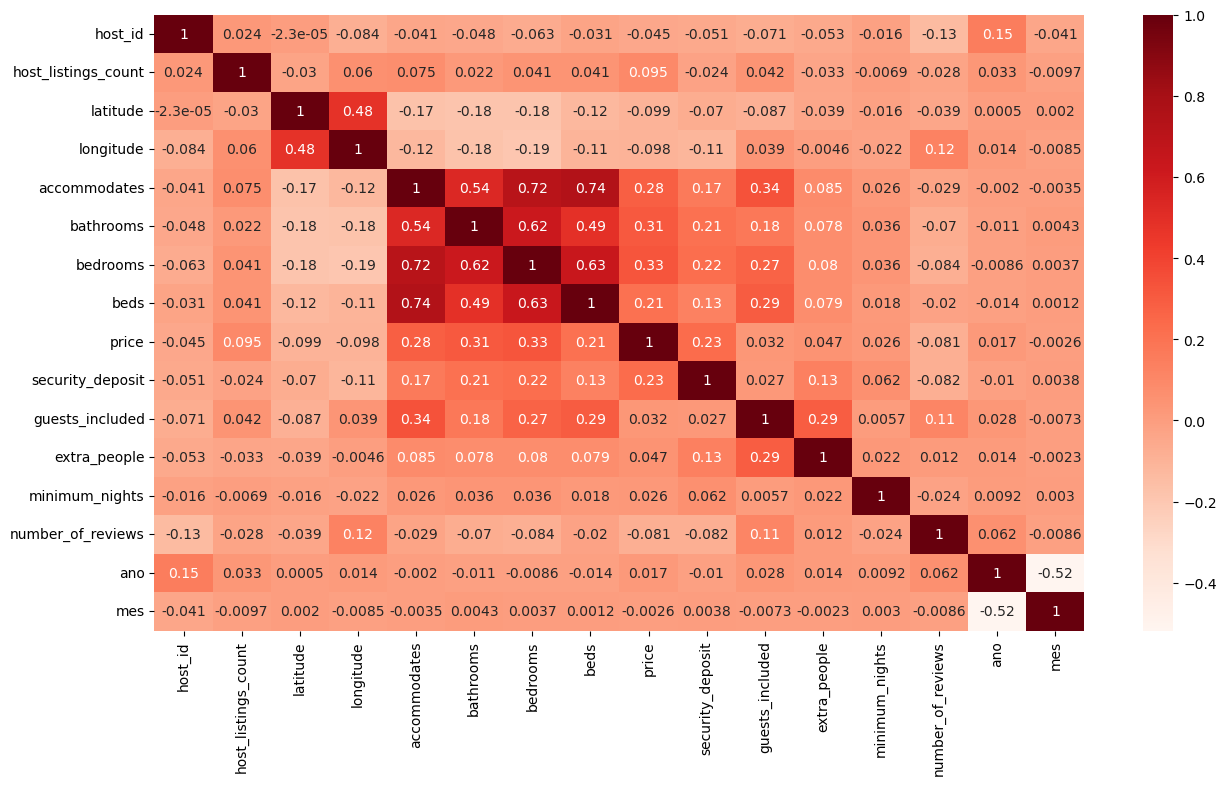

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(base_airbnb.corr(), annot=True, cmap='Reds')

In [82]:
base_airbnb.describe()

,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,ano,mes
count,8.401460e+05,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.00000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000
mean,6.472490e+07,8.855943,-22.967199,-43.246477,4.186602,1.689980,1.638190,2.587609,649.82373,1176.153076,1.692880,40.536888,4.578998,8.110012,2018.868918,6.309237
std,6.697702e+07,48.277079,0.032579,0.091251,2.419245,1.188919,1.064695,1.992381,1693.45166,1822.706177,1.537727,99.381271,21.160678,22.406019,0.716689,3.387802
min,2.616000e+03,0.000000,-23.073400,-43.635191,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,2018.000000,1.000000
25%,1.366422e+07,1.000000,-22.984971,-43.296457,2.000000,1.000000,1.000000,1.000000,152.00000,500.000000,1.000000,0.000000,1.000000,0.000000,2018.000000,4.000000
50%,4.836017e+07,1.000000,-22.971740,-43.197567,4.000000,1.000000,1.000000,2.000000,298.00000,1179.685425,1.000000,0.000000,2.000000,1.000000,2019.000000,6.000000
75%,8.458217e+07,3.000000,-22.950458,-43.186252,5.000000,2.000000,2.000000,3.000000,601.00000,1179.685425,2.000000,50.000000,4.000000,5.000000,2019.000000,9.000000
max,3.468845e+08,1495.000000,-22.755316,-43.109931,36.000000,200.000000,45.000000,86.000000,138262.00000,82957.000000,36.000000,5631.000000,1224.000000,401.000000,2020.000000,12.000000


- Olhando o resumo estatistico observa - se alguns pontos. Algumas variaveis importantes com valores minimos em zero,
     - baathrooms 
     - bedrooms 
     - beds 
     - price
            
Não é comum registros com essa caracteristica conter valores zerados. Se tratanto de imoveis para aluguel, não faz sentido não se ter quartos, banheiros ou camas. Porém tem que ser levado em consideraçao que pode se tratar de imoveis para negocios do tipo escritorio ou tipos variados de comodidades como igloo, casa na arvore etc.
<br>
<br>
<br>
<br>
<br>
- Quantidade de dados com valor zero

In [83]:
print(len(base_airbnb[base_airbnb['price'] == 0]))
print(len(base_airbnb[base_airbnb['bathrooms'] == 0]))
print(len(base_airbnb[base_airbnb['bedrooms'] == 0]))
print(len(base_airbnb[base_airbnb['beds'] == 0]))

263
1901
49938
4804


No entanto a variavel preço não poderia estar com valores zero, se um imovel esta cadastrado para ser alugado nao faz sentido estar sem preço .

Quando se trata de modelos de predição de preços de imóveis, ter dados com variáveis importantes contendo valores zero pode levar a problemas e resultados imprecisos. Quando variáveis importantes contêm valores zero, o modelo pode ter dificuldade em aprender os padrões corretos e fazer previsões imprecisas. Isso pode introduzir um viés nos dados .

Os dados de preço que estao com valores 0.00 serão tratados e preenchidos com a mediana, visto que temos valores extremos em price. A mediana é menos sensível a valores extremos (outliers) do que a média.

In [84]:
mediana = base_airbnb['price'].median()
base_airbnb['price'] = base_airbnb['price'].replace(0, mediana)
base_airbnb.describe()

,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,ano,mes
count,8.401460e+05,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000,840146.000000
mean,6.472490e+07,8.855943,-22.967199,-43.246477,4.186602,1.689980,1.638190,2.587609,649.917236,1176.153076,1.692880,40.536888,4.578998,8.110012,2018.868918,6.309237
std,6.697702e+07,48.277079,0.032579,0.091251,2.419245,1.188919,1.064695,1.992381,1693.422363,1822.706177,1.537727,99.381271,21.160678,22.406019,0.716689,3.387802
min,2.616000e+03,0.000000,-23.073400,-43.635191,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2018.000000,1.000000
25%,1.366422e+07,1.000000,-22.984971,-43.296457,2.000000,1.000000,1.000000,1.000000,152.000000,500.000000,1.000000,0.000000,1.000000,0.000000,2018.000000,4.000000
50%,4.836017e+07,1.000000,-22.971740,-43.197567,4.000000,1.000000,1.000000,2.000000,298.000000,1179.685425,1.000000,0.000000,2.000000,1.000000,2019.000000,6.000000
75%,8.458217e+07,3.000000,-22.950458,-43.186252,5.000000,2.000000,2.000000,3.000000,601.000000,1179.685425,2.000000,50.000000,4.000000,5.000000,2019.000000,9.000000
max,3.468845e+08,1495.000000,-22.755316,-43.109931,36.000000,200.000000,45.000000,86.000000,138262.000000,82957.000000,36.000000,5631.000000,1224.000000,401.000000,2020.000000,12.000000


### Definiçao de funçoes para análise de Outliers
Definir algumas funções para ajudar na análise de outliers das colunas e plotagem

In [85]:
def limites(coluna):
    q1 = coluna.quantile(0.25)                                   # Define os limites
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outlier(df, coluna_nome):                            # Exclui dados acima do limite
    qtd_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[coluna_nome])
    df = df.loc[(df[coluna_nome] >= lim_inf) & (df[coluna_nome] <= lim_sup), :]
    linhas_removidas = qtd_linhas - df.shape[0]
    return df, linhas_removidas

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1 , 2)
    fig.set_size_inches(15, 4)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist=True)   
    
def graf_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))
    
def scatter_plot(coluna):
    target = base_airbnb['price']  
    plt.figure(figsize=(5, 4))
    plt.scatter(coluna, target)
    plt.ylabel('Price')
    plt.show()

##     Price

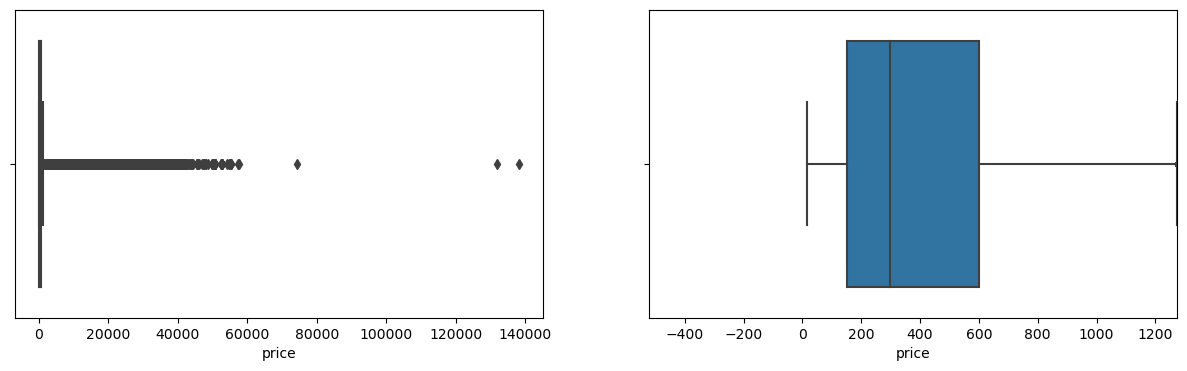

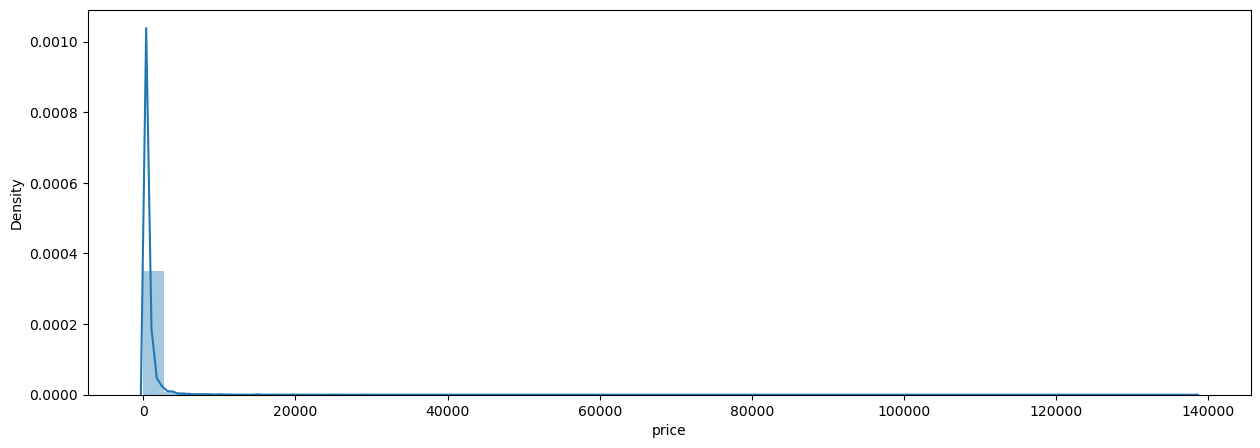

In [86]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

A variável price contem bastante outliers e consequentemente apresenta uma distribuição ruim, esses valores extremos podem distorcer a distribuição e influenciar a previsão do modelo . 

Por outro lado, trata-se de uma variável muito importante para o modelo de negócio em questão, tem que ser levado em consideração todos os valores presentes desde que sejam legitimos e tentar entender esses dados ao invés de simplesmente eliminar seus valores discrepantes.

Em vez de remover os outliers, seria mais interessante trabalhar esses dados e transforma-los de alguma forma.

A principio optei por aplicar algumas técnicas comumente utilizadas para reduzir a variação dos dados e lidar com valores extremos, transformação logarítmica, métricas matematicas, Winsorização etc. Essas tecnicas ajudam a reduzir a influência dos outliers mais extremos, ajudam na distribuição dos dados de forma mais simétrica e reduz o impacto dos valores discrepantes no modelo.

Porem nao obteve um resultado satisfatorio. Foi testado metricas logaritimicas, matematicas, Winsorização entre outros metodos. Inviabilizaram muito os valores reduzindo significamente .

Então seria necessario manter os dados como estão mas tambem saber um pouco mais sobre esses valores .

In [87]:
# base_airbnb['price'] = np.log2(base_airbnb['price'])

In [88]:
# diagrama_caixa(base_airbnb['price'])
# histograma(base_airbnb['price'])

In [89]:
# Outliers isolados , dados com valores maiores que 10 mil

df_outliers = base_airbnb[base_airbnb['price'] > 10000]
df_outliers.sort_values('price', ascending=False)

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
29468,247378002,Loris,2019-03-07,f,27.0,-22.98217,-43.19344,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Doorman,Breakfast,Elevator,H...",138262.0,0.000000,2,0.0,1,0,t,f,strict_14_with_grace_period,2020,5,Copacabana
29653,247378002,Loris,2019-03-07,f,27.0,-22.98217,-43.19344,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Doorman,Breakfast,Elevator,H...",131727.0,0.000000,2,0.0,1,0,t,f,strict_14_with_grace_period,2020,4,Copacabana
31035,66877715,Alan Mattos,2016-04-12,f,54.0,-23.01049,-43.28860,House,Entire home/apt,8,6.0,4.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",74201.0,4998.000000,8,0.0,1,0,f,f,super_strict_30,2020,2,Joá
35158,30721359,I Live,2015-04-06,f,29.0,-22.98305,-43.19457,Apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",57517.0,0.000000,1,0.0,3,0,t,f,moderate,2020,5,Copacabana
28164,30721359,I Live,2015-04-06,f,29.0,-23.00072,-43.27549,Villa,Entire home/apt,10,4.0,4.0,5.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",57180.0,0.000000,1,0.0,3,0,f,f,strict_14_with_grace_period,2020,5,São Conrado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11641,58739989,Suetlana,2016-02-14,f,1.0,-22.96868,-43.18441,Apartment,Shared room,1,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Kitchen,Do...",10001.0,1179.685425,1,0.0,1,0,f,f,flexible,2019,3,Copacabana
11390,57375488,Zenilda,2016-02-04,f,1.0,-22.97315,-43.38924,Apartment,Private room,6,2.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",P...",10001.0,1179.685425,1,0.0,20,0,t,f,flexible,2019,3,Barra da Tijuca
9063,14315601,Aroldo,2014-04-15,f,44.0,-23.00112,-43.38991,House,Entire home/apt,10,6.5,4.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",10001.0,1179.685425,1,0.0,10,0,f,f,flexible,2019,3,Barra da Tijuca
3022,13321481,Leonardo,2014-03-19,f,1.0,-22.98186,-43.21211,Apartment,Entire home/apt,14,4.5,4.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",10001.0,1179.685425,1,0.0,15,0,f,f,flexible,2019,6,Ipanema


#### Análisando algumas variaveis dos outliers para entender melhor
- Há dois imoveis  com valores mais altos que os demais, pertencem ao mesmo proprietario .
    
- Maior concentração dos imoveis mais caros estao entre dois bairros, Barra da Tijuca e Copacabana. Juntos somam 77% dos dados.
- Dois proprietarios se destacam com maior quantidade de imoveis . A imobiliaria Latin Exclusive, uma imobiliaria de imoveis de luxo no Rio de Janeiro, a empresa concentra 40% dos dados. E a Manfred 22% .
        
- Olhando as quantidades de quartos, banheiros e camas, esses numeros aparentam uma boa distribuição, não parecem ter grande variação que possa justificar esses outliers .

            A maioria dos imoveis estao localizados em bairros de alto padrao no Rio de Janeiro e sao administrados por imobiliarias de luxo, consequentemente são mais caros e fora da media dos imoveis em geral. 

Barra da Tijuca             1349
Copacabana                   687
São Conrado                  227
Ipanema                      179
Recreio dos Bandeirantes     173
Name: neighbourhood, dtype: int64
Barra da Tijuca             51.586998
Copacabana                  26.271511
São Conrado                  8.680688
Ipanema                      6.845124
Recreio dos Bandeirantes     6.615679
Name: neighbourhood, dtype: float64


<Axes: >

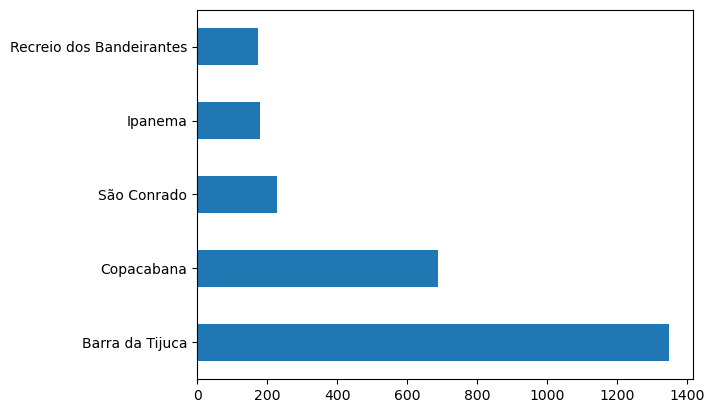

In [90]:
# Bairros

print(df_outliers['neighbourhood'].value_counts().head(5))
print(df_outliers['neighbourhood'].value_counts().head(5) / df_outliers['neighbourhood'].value_counts().head(5).sum() * 100)
df_outliers['neighbourhood'].value_counts().head(5).plot(kind='barh')

Latin Exclusive    218
Manfred            121
WhereInRio          70
Ricardo             66
Michael             65
Name: host_name, dtype: int64
Latin Exclusive    40.370370
Manfred            22.407407
WhereInRio         12.962963
Ricardo            12.222222
Michael            12.037037
Name: host_name, dtype: float64


<Axes: >

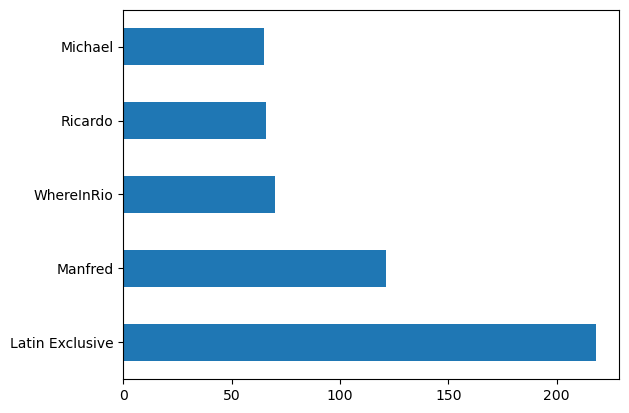

In [91]:
# Proprietarios

print(df_outliers['host_name'].value_counts().head(5))
print(df_outliers['host_name'].value_counts().head(5) / df_outliers['host_name'].value_counts().head(5).sum() * 100)
df_outliers['host_name'].value_counts().head(5).plot(kind='barh')

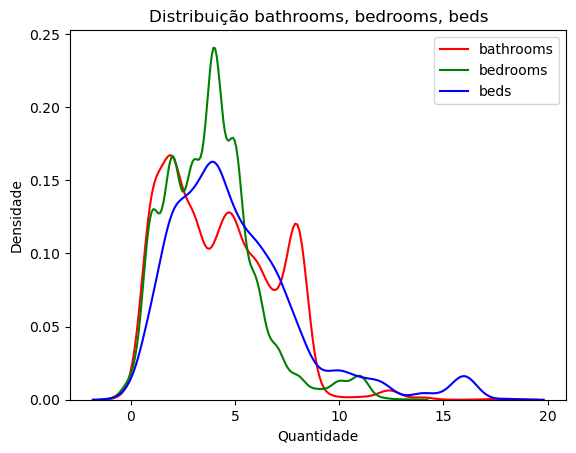

In [92]:
# Banheiros, quartos e camas

sns.distplot(df_outliers['bathrooms'], hist=False, kde=True, label='bathrooms', color='red')
sns.distplot(df_outliers['bedrooms'], hist=False, kde=True, label='bedrooms', color='green')
sns.distplot(df_outliers['beds'], hist=False, kde=True, label='beds', color='blue')

plt.xlabel('Quantidade')
plt.ylabel('Densidade')
plt.title('Distribuição bathrooms, bedrooms, beds')

plt.legend()
plt.show()

## security_deposit
   - Deposito de segurança

In [93]:
base_airbnb.sort_values('security_deposit', ascending=False).head()

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
5798,30619781,Renato88,2015-04-05,f,1.0,-22.99902,-43.39919,Apartment,Entire home/apt,10,6.0,4.0,7.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Pool,Kitch...",6078.0,82957.0,1,0.0,15,0,f,f,strict_14_with_grace_period,2020,5,Barra da Tijuca
5793,30619781,Renato88,2015-04-05,f,1.0,-22.99902,-43.39919,Apartment,Entire home/apt,10,6.0,4.0,7.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Pool,Kitch...",5843.0,79755.0,1,0.0,15,0,f,f,strict_14_with_grace_period,2020,4,Barra da Tijuca
5834,30619781,Renato88,2015-04-05,f,1.0,-22.99902,-43.39919,Apartment,Entire home/apt,10,6.0,4.0,7.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Pool,Kitch...",5576.0,76100.0,1,0.0,15,0,f,f,strict_14_with_grace_period,2020,3,Barra da Tijuca
15506,85804392,Porthos,2016-07-25,f,1.0,-22.99012,-43.37930,House,Entire home/apt,10,7.5,5.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11063.0,71910.0,1,0.0,15,0,t,f,moderate,2020,5,Barra da Tijuca
15515,85804392,Porthos,2016-07-25,f,1.0,-22.99012,-43.37930,House,Entire home/apt,10,7.5,5.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",10469.0,68046.0,1,0.0,15,0,t,f,moderate,2020,4,Barra da Tijuca


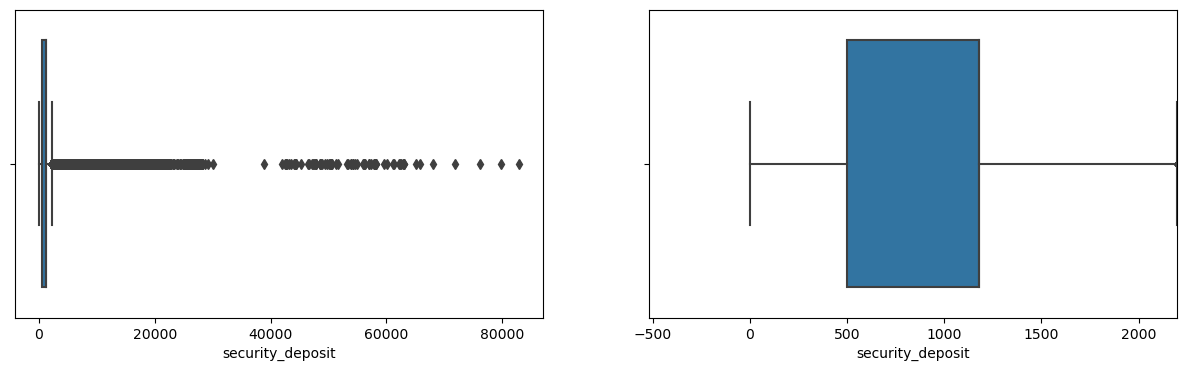

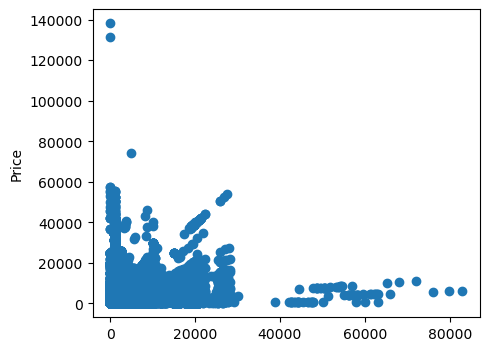

In [94]:
diagrama_caixa(base_airbnb['security_deposit'])
scatter_plot(base_airbnb['security_deposit'])

Essa variavel é um pouco mais complexa de analisar, deposito de segurança é uma coisa muito particular de cada proprietario, ele pode colocar o valor que ele entende que vale seu imovel. Complicado analisar a legitimidade desses dados . Será mantida como está .

## host_listings_count

  - O número de anúncios que o anfitrião possui (pode ser mais de um imovel) 

Tambem há presença de muitos valores extremos mas como vimos nos dados anteriormente, existem grandes imobiliarias que admnistram muitos imoveis para locação . 

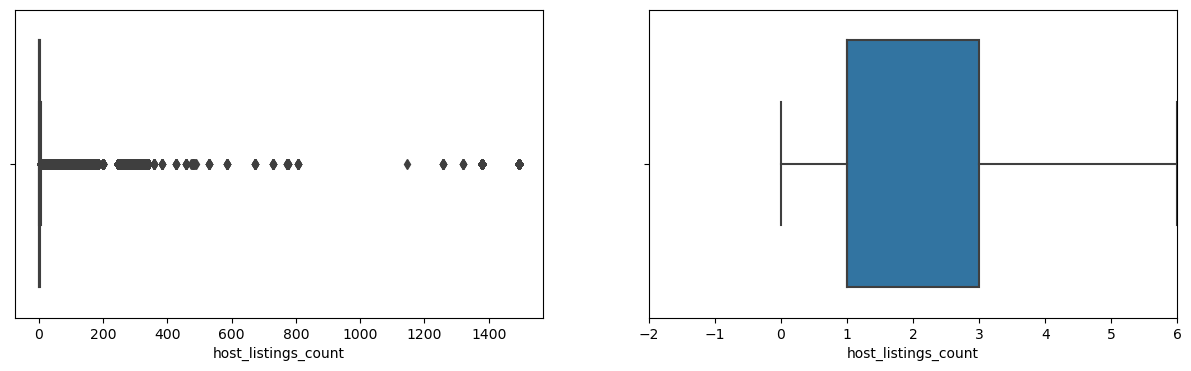

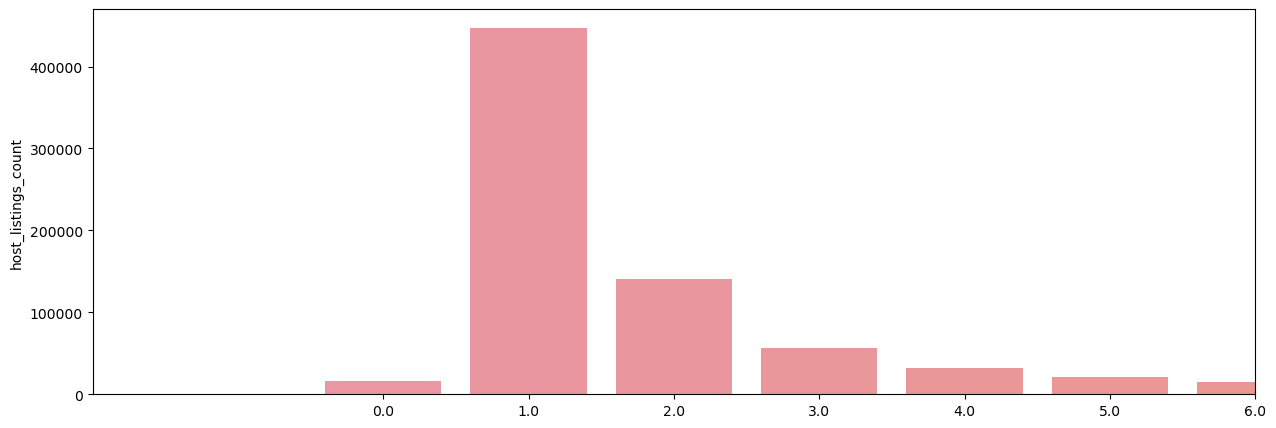

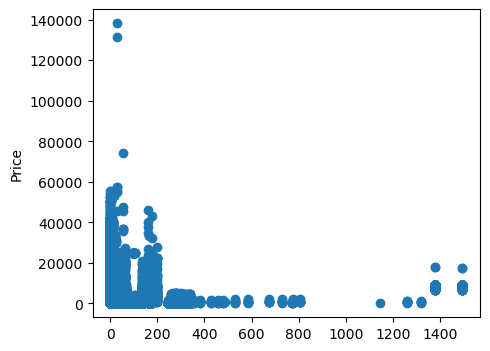

In [95]:
diagrama_caixa(base_airbnb['host_listings_count'])
graf_barra(base_airbnb['host_listings_count'])
scatter_plot(base_airbnb['host_listings_count'])

## accommodates
   - A capacidade máxima da acomodação (quantidade de pessoas)
   
Existem propriedades do tipo 'house' que suporta uma capacidade maior de pessoas, com ate 12 banheiros, 18 camas e 12 quartos . Se trata de uma propriedade grande, justifica os outliers presente nessa categoria, existe esse tipo de imovel . 

In [96]:
df_accomodates = base_airbnb[base_airbnb['accommodates'] > 10]
df_accomodates.sort_values('accommodates', ascending=False).head(3)

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
18950,22805631,Latin Exclusive,2014-10-21,t,185.0,-22.99885,-43.27421,House,Entire home/apt,36,12.0,12.0,18.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",10441.0,7956.0,36,0.0,7,0,f,f,strict_14_with_grace_period,2020,5,São Conrado
29149,15900036,Assunção De Fatima,2014-05-23,t,30.0,-22.99640,-43.38902,House,Entire home/apt,25,5.5,7.0,12.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",2203.0,0.0,2,70.0,1,2,t,f,moderate,2020,1,Barra da Tijuca
28037,15900036,Assunção De Fatima,2014-05-23,t,32.0,-22.99640,-43.38902,House,Entire home/apt,25,5.5,7.0,12.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",2205.0,0.0,2,70.0,1,4,f,f,moderate,2020,5,Barra da Tijuca


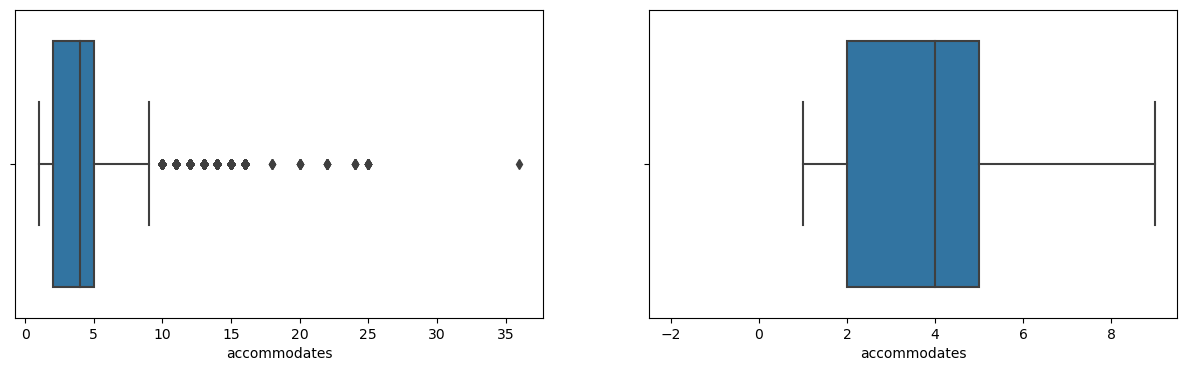

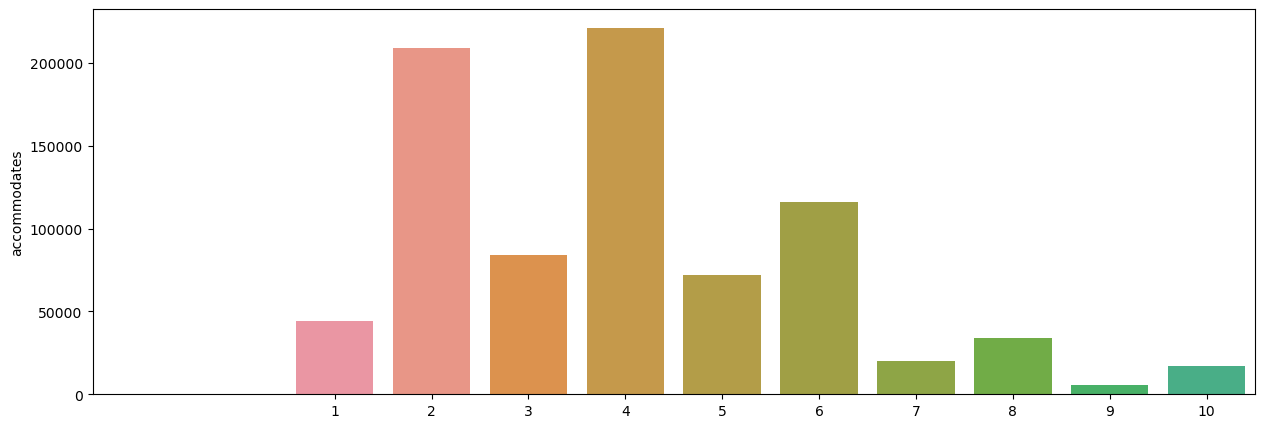

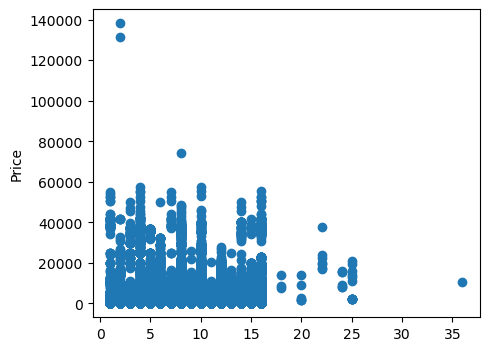

In [97]:
diagrama_caixa(base_airbnb['accommodates'])
graf_barra(base_airbnb['accommodates'])
scatter_plot(base_airbnb['accommodates'])

## bathrooms


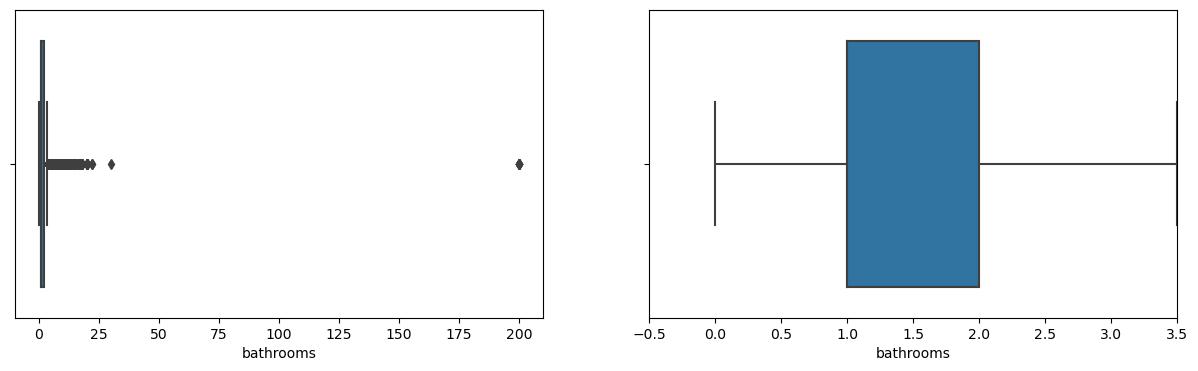

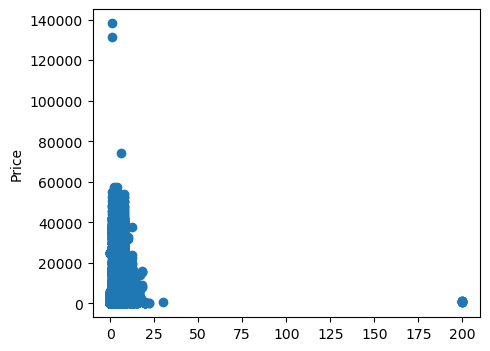

In [98]:
diagrama_caixa(base_airbnb['bathrooms'])
scatter_plot(base_airbnb['bathrooms'])

In [99]:
df_bathrooms = base_airbnb[base_airbnb['bathrooms'] > 50]
df_bathrooms.sort_values('bathrooms', ascending=False).head(10)

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
28241,70159544,Rent RIO,2016-05-03,f,100.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",946.0,0.0,1,0.0,4,0,t,f,super_strict_60,2020,4,Ipanema
29957,70159544,Temporada,2016-05-03,f,81.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",511.0,0.0,1,0.0,3,0,t,f,super_strict_60,2019,12,Ipanema
29051,70159544,Rent RIO,2016-05-03,f,67.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",821.0,0.0,1,0.0,4,0,t,f,super_strict_60,2020,2,Ipanema
29219,70159544,Temporada,2016-05-03,f,58.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",726.0,0.0,1,0.0,4,0,t,f,super_strict_60,2020,1,Ipanema
28612,70159544,Rent RIO,2016-05-03,f,101.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",817.0,0.0,1,0.0,4,0,t,f,super_strict_60,2020,3,Ipanema
30615,70159544,Temporada,2016-05-03,f,78.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",945.0,0.0,1,0.0,3,0,t,f,super_strict_60,2019,11,Ipanema
31545,70159544,Temporada,2016-05-03,f,73.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",946.0,0.0,1,0.0,3,0,t,f,super_strict_60,2019,10,Ipanema
32914,70159544,Temporada Express,2016-05-03,f,70.0,-22.9874,-43.19263,House,Entire home/apt,5,200.0,2.0,3.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Elevator,Washer,...",944.0,0.0,1,0.0,3,0,t,f,super_strict_60,2019,9,Ipanema


In [100]:
print(len(base_airbnb[base_airbnb['bathrooms'] == 200])) 

8


Um caso diferente, oito anuncios de propriedades com uma quantidade exagerada de banheiros. Que nao faz sentido em relaçao ao limite de accommodates, quartos e camas. Provavelmente um erro de digitaçao pelo usuario . Esse outlier será deletado da base .

In [101]:
base_airbnb = base_airbnb[base_airbnb['bathrooms'] != 200]

## bedrooms

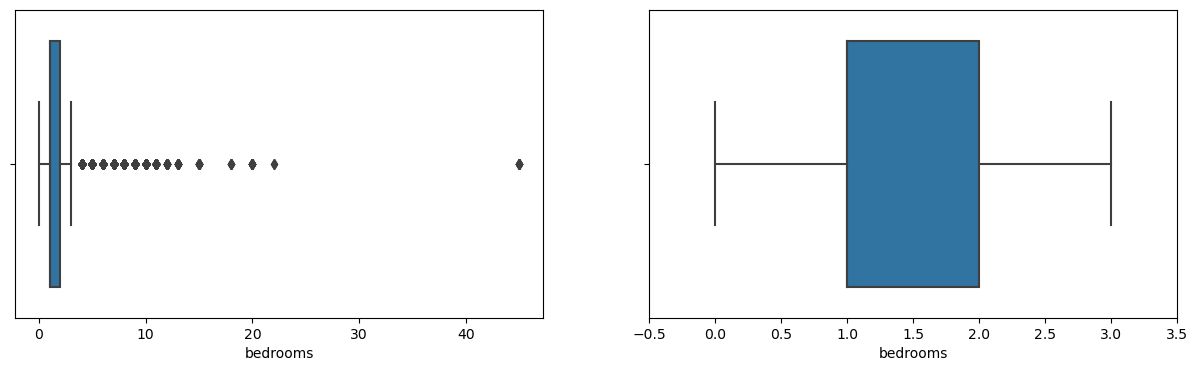

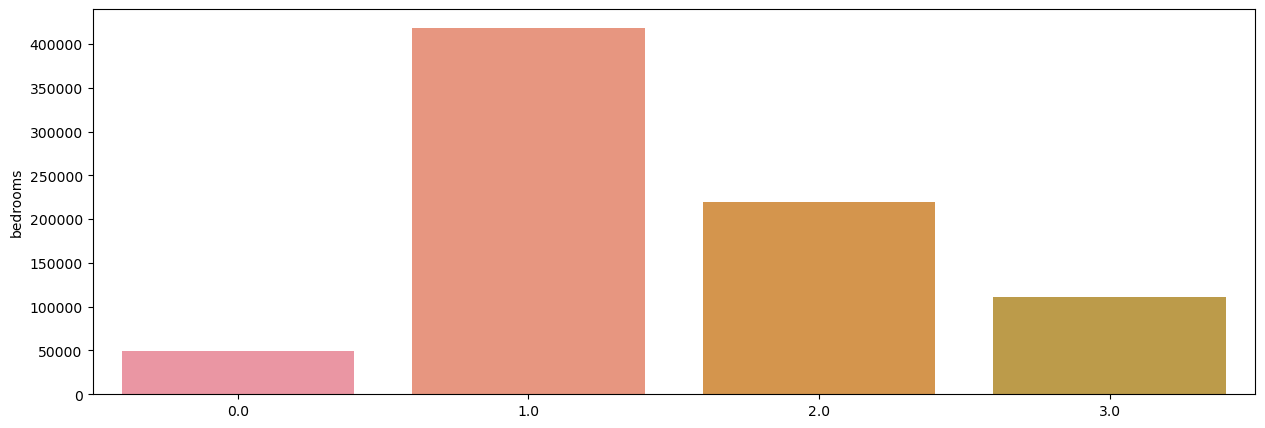

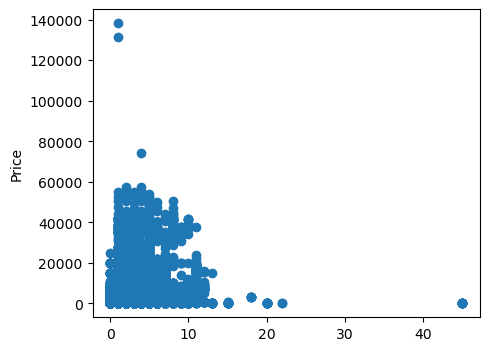

In [102]:
diagrama_caixa(base_airbnb['bedrooms'])
graf_barra(base_airbnb['bedrooms'])
scatter_plot(base_airbnb['bedrooms'])

In [103]:
base_airbnb.sort_values('bedrooms', ascending=False).head(8)

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
30839,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",93.0,0.0,1,50.0,1,4,t,f,flexible,2018,12,Lapa
29271,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",94.0,0.0,1,50.0,1,5,t,f,flexible,2019,1,Lapa
38460,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",92.0,0.0,1,50.0,1,2,t,f,flexible,2018,5,Lapa
11442,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",92.0,0.0,1,50.0,1,4,t,f,flexible,2018,9,Lapa
37073,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",93.0,0.0,1,50.0,1,3,t,f,flexible,2018,7,Lapa
31917,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",91.0,0.0,1,50.0,1,4,t,f,flexible,2018,11,Lapa
35876,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",93.0,0.0,1,50.0,1,3,t,f,flexible,2018,8,Lapa
39243,179022505,Hotel & Hostel Villa Santana,2018-03-17,f,1.0,-22.908955,-43.188173,House,Private room,16,20.0,45.0,50.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",92.0,0.0,1,50.0,1,1,t,f,flexible,2018,4,Lapa


Essa propriedade apresenta grande quantidade de quartos, um dados que pode fazer sentido visto que se trata de uma casa e as quantidades de accommodates, camas e banheiros acompanham proporcionalmente .

## beds

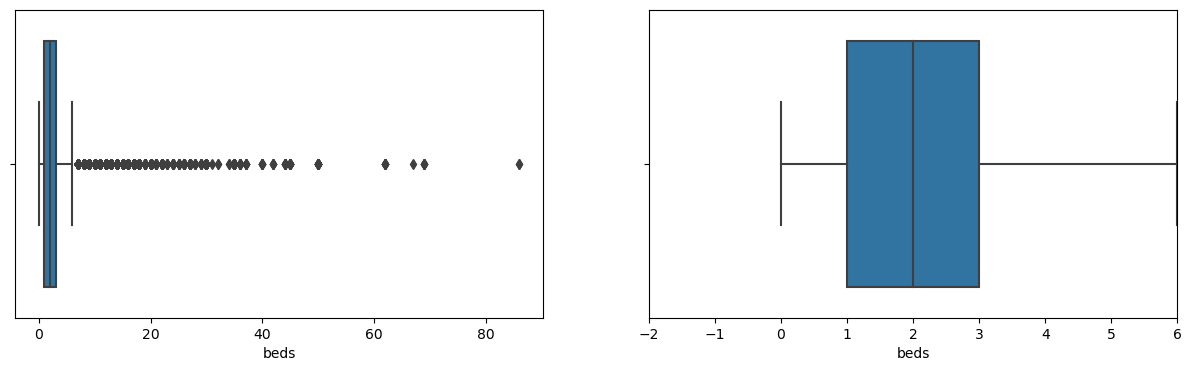

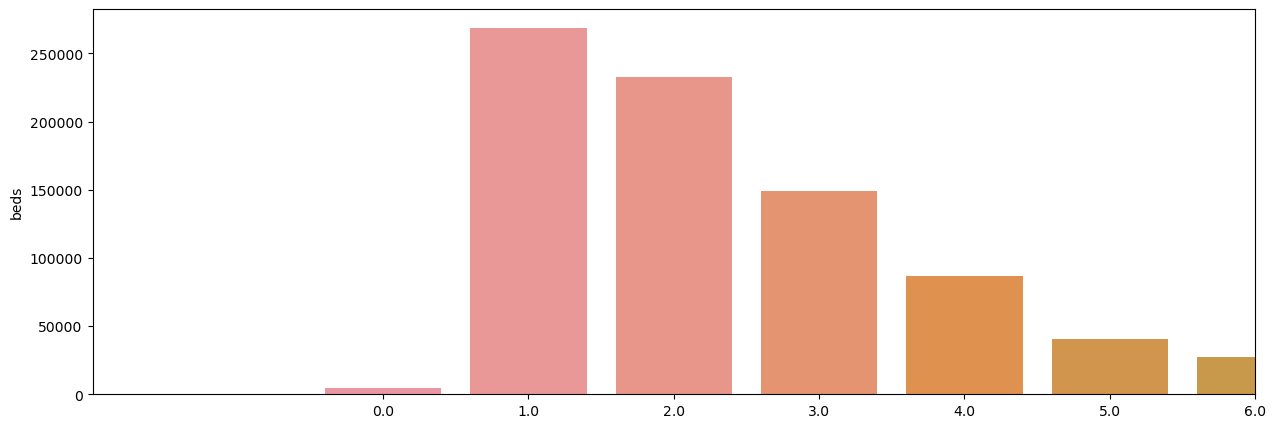

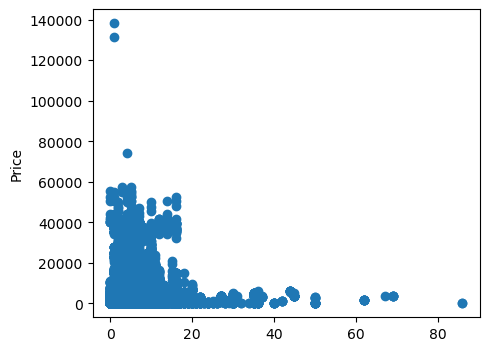

In [104]:
diagrama_caixa(base_airbnb['beds'])
graf_barra(base_airbnb['beds'])
scatter_plot(base_airbnb['beds'])

In [105]:
df_beds = base_airbnb[base_airbnb['beds'] > 30]
df_beds.sort_values('beds', ascending=False)

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
33913,271820353,Pontal,2019-06-27,f,2.0,-23.029410,-43.472390,Hotel,Private room,2,22.0,22.0,86.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Free parking on p...",151.0,1179.685425,1,0.0,1,0,t,f,flexible,2019,8,Recreio dos Bandeirantes
35023,271820353,Pontal,2019-06-27,f,2.0,-23.029410,-43.472390,Hotel,Private room,2,22.0,22.0,86.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Free parking on p...",150.0,1179.685425,1,0.0,1,0,t,f,flexible,2019,7,Recreio dos Bandeirantes
21700,156193966,Farid,2017-10-25,f,3.0,-23.003580,-43.382970,House,Entire home/apt,16,15.0,11.0,69.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",3751.0,5000.000000,16,95.0,2,0,f,f,strict_14_with_grace_period,2019,10,Barra da Tijuca
20365,156193966,Farid,2017-10-25,f,3.0,-23.003580,-43.382970,House,Entire home/apt,16,15.0,11.0,69.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",3748.0,5000.000000,16,95.0,2,0,f,f,strict_14_with_grace_period,2020,2,Barra da Tijuca
20901,156193966,Farid,2017-10-25,f,3.0,-23.003580,-43.382970,House,Entire home/apt,16,15.0,11.0,69.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",3750.0,5000.000000,16,95.0,2,0,f,f,strict_14_with_grace_period,2019,12,Barra da Tijuca
20443,156193966,Farid,2017-10-25,f,3.0,-23.003580,-43.382970,House,Entire home/apt,16,15.0,11.0,69.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",3752.0,5000.000000,16,95.0,2,0,f,f,strict_14_with_grace_period,2020,1,Barra da Tijuca
21218,156193966,Farid,2017-10-25,f,3.0,-23.003580,-43.382970,House,Entire home/apt,16,15.0,11.0,69.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",3749.0,5000.000000,16,95.0,2,0,f,f,strict_14_with_grace_period,2019,11,Barra da Tijuca
20122,156193966,Farid,2017-10-25,f,3.0,-23.003580,-43.382970,House,Entire home/apt,16,16.5,10.0,67.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",3749.0,5000.000000,16,95.0,2,1,f,f,strict_14_with_grace_period,2020,3,Barra da Tijuca
24511,207330762,Vitoria,2018-08-04,f,15.0,-22.992950,-43.435380,House,Shared room,16,7.5,1.0,62.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Suit...",1501.0,1179.685425,1,65.0,2,0,f,f,strict_14_with_grace_period,2019,12,Recreio dos Bandeirantes
23525,207330762,Vitoria,2018-08-04,f,16.0,-22.992950,-43.435380,House,Shared room,16,7.5,1.0,62.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Suit...",1502.0,1179.685425,1,65.0,2,0,f,f,strict_14_with_grace_period,2020,3,Recreio dos Bandeirantes


Nesse caso os dados de propriedades com quantidade de camas nao fazem muito sentido, não é proporcional a quantidade de bedrooms do imovel, é provavelmente um erro de digitaçao . Será deletado esses dados

In [106]:
base_airbnb = base_airbnb.drop(base_airbnb[base_airbnb['beds'] >= 30].index)

## guests_included
   - número de hóspedes incluído no preço
   
Essa feature nao parece fazer muito sentido, provavelmene está tendo um erro de entendimento dessa categoria por parte do usuario. Está sendo preenchido igual a accommodates, semelhante a quantidade maxima que o imovel suporta e nao é isso que ela representa . 

Parece que os usuários do airbnb usam muito o valor padrão do airbnb como 1 guest included.<br>
Essa feature será removida da análise, além dos erros de preenchimento por parte do usuario, esses dados nao me parecem essencial para o modelo .

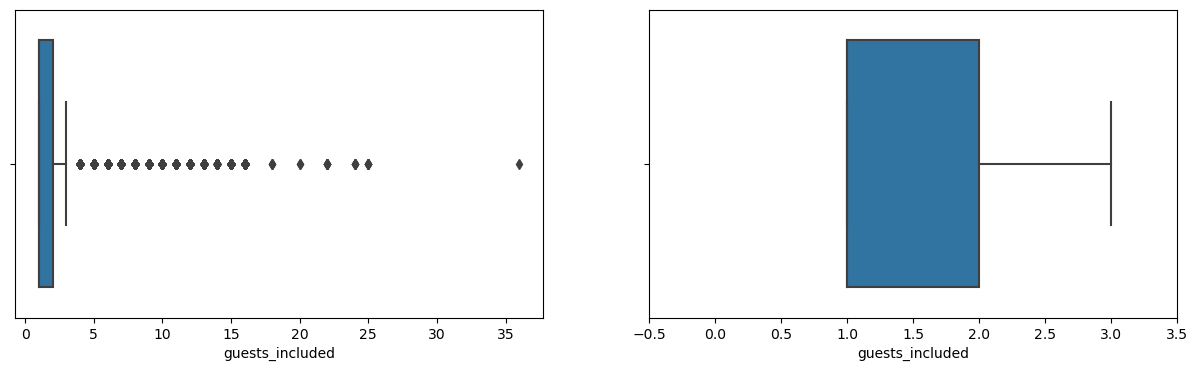

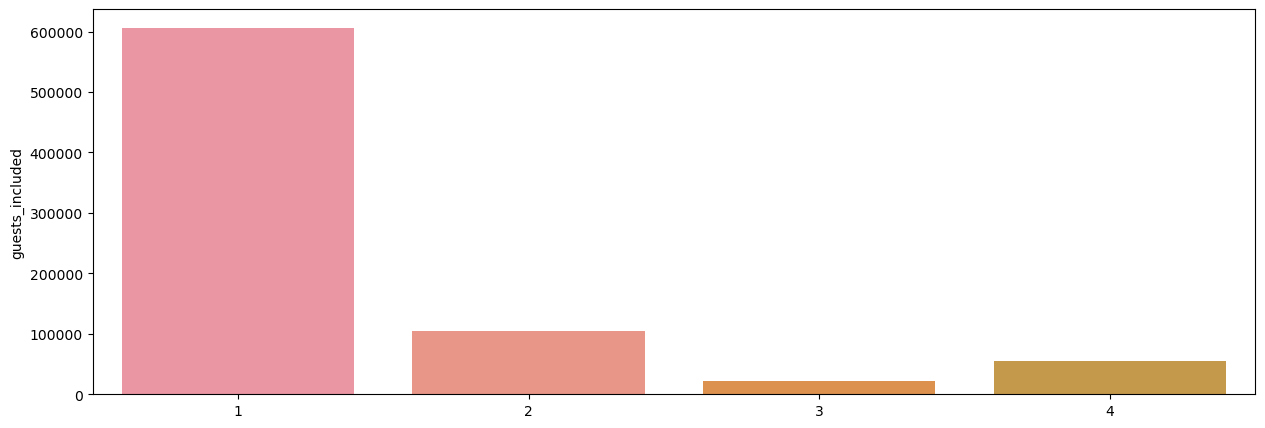

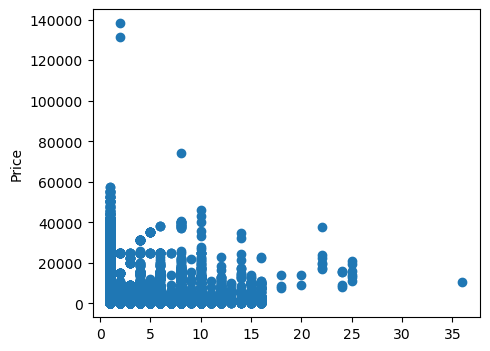

In [107]:
diagrama_caixa(base_airbnb['guests_included'])
graf_barra(base_airbnb['guests_included'])
scatter_plot(base_airbnb['guests_included'])

In [108]:
base_airbnb.sort_values('guests_included', ascending=False).head(4)

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,guests_included,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
18950,22805631,Latin Exclusive,2014-10-21,t,185.0,-22.99885,-43.27421,House,Entire home/apt,36,12.0,12.0,18.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",10441.0,7956.0,36,0.0,7,0,f,f,strict_14_with_grace_period,2020,5,São Conrado
20157,22805631,Latin Exclusive,2014-10-21,t,182.0,-22.99885,-43.27421,House,Entire home/apt,25,11.0,11.0,15.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11020.0,8396.0,25,0.0,7,0,f,f,super_strict_60,2019,11,São Conrado
19139,22805631,Latin Exclusive,2014-10-21,t,161.0,-22.99885,-43.27421,House,Entire home/apt,25,11.0,11.0,15.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",15981.0,10147.0,25,0.0,7,0,f,f,super_strict_60,2020,3,São Conrado
19438,22805631,Latin Exclusive,2014-10-21,t,163.0,-22.99885,-43.27421,House,Entire home/apt,25,11.0,11.0,15.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",13219.0,8393.0,25,0.0,7,0,f,f,super_strict_60,2020,1,São Conrado


In [109]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)

## minimum_nights
   - Número mínimo de pernoites para o anúncio 

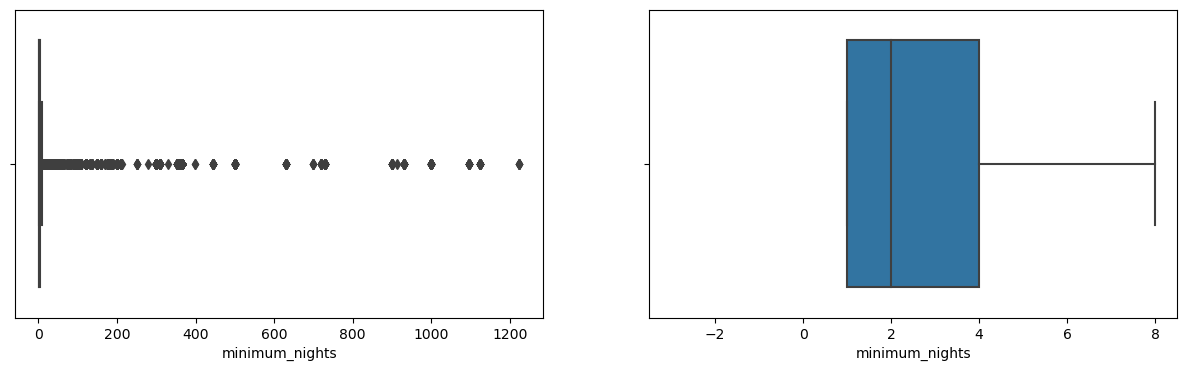

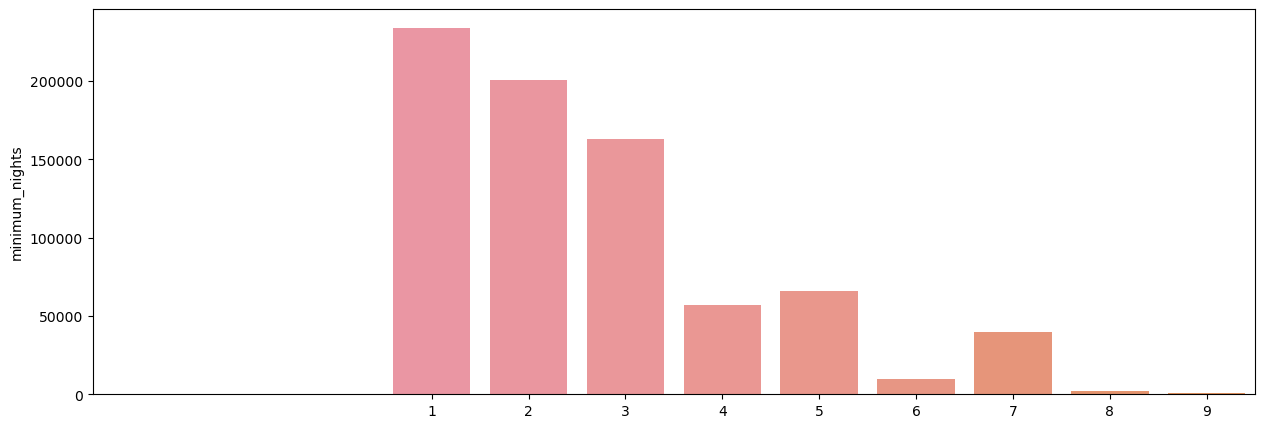

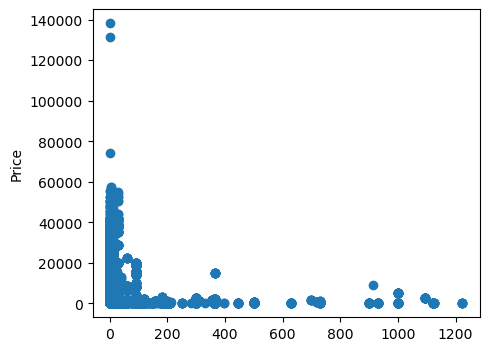

In [110]:
diagrama_caixa(base_airbnb['minimum_nights'])
graf_barra(base_airbnb['minimum_nights'])
scatter_plot(base_airbnb['minimum_nights'])

In [111]:
base_airbnb.sort_values('minimum_nights', ascending=False)

,host_id,host_name,host_since,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,extra_people,minimum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes,neighbourhood
1929,3704530,Adriana,2012-09-28,f,1.0,-22.922467,-43.184041,Apartment,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",109.0,500.000000,100.0,1224,5,t,f,strict_14_with_grace_period,2018,8,Santa Teresa
1751,3704530,Adriana,2012-09-28,f,1.0,-22.922467,-43.184041,Apartment,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",110.0,500.000000,100.0,1224,5,t,f,strict_14_with_grace_period,2018,11,Santa Teresa
1946,3704530,Adriana,2012-09-28,f,1.0,-22.922467,-43.184041,Apartment,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",108.0,500.000000,100.0,1224,5,t,f,strict_14_with_grace_period,2018,7,Santa Teresa
24616,3704530,Adriana,2012-09-28,f,1.0,-22.922467,-43.184041,Apartment,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",108.0,500.000000,100.0,1224,5,t,f,strict_14_with_grace_period,2018,9,Santa Teresa
1808,3704530,Adriana,2012-09-28,f,1.0,-22.922467,-43.184041,Apartment,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",109.0,500.000000,100.0,1224,5,t,f,strict_14_with_grace_period,2018,10,Santa Teresa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24456,11063753,Isadora,2014-01-06,f,2.0,-22.968990,-43.182720,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Door...",61.0,1000.000000,50.0,1,14,f,f,strict_14_with_grace_period,2020,2,Copacabana
24448,62329420,Ana Claudia,2016-03-09,f,2.0,-22.973210,-43.383080,Condominium,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",119.0,1179.685425,80.0,1,3,f,f,flexible,2020,2,Barra da Tijuca
18815,129468793,Carla,2017-05-08,f,3.0,-22.957380,-43.200830,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",147.0,0.000000,55.0,1,11,f,f,strict_14_with_grace_period,2020,3,Humaitá
18816,122818502,Patty,2017-03-27,f,1.0,-22.967380,-43.177540,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Air conditioning"",Kitchen,Elevator,""Famil...",250.0,1179.685425,0.0,1,0,t,f,flexible,2020,3,Copacabana


Dados com grande quantidade de minimo de dias, existem imoveis para temporada ou tipos de apartamentos para moradia onde o proprietario ou a imobiliaria pode pedir um periodo minimo , 1 a 6 meses ou ate mais de 1 ano quando se trata de moradia .

## number_of_reviews
   - O número de comentários que a listagem tem

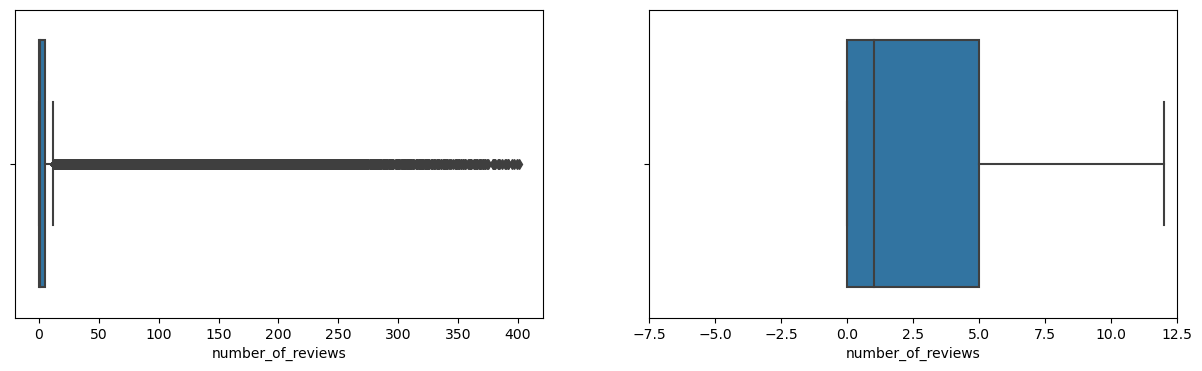

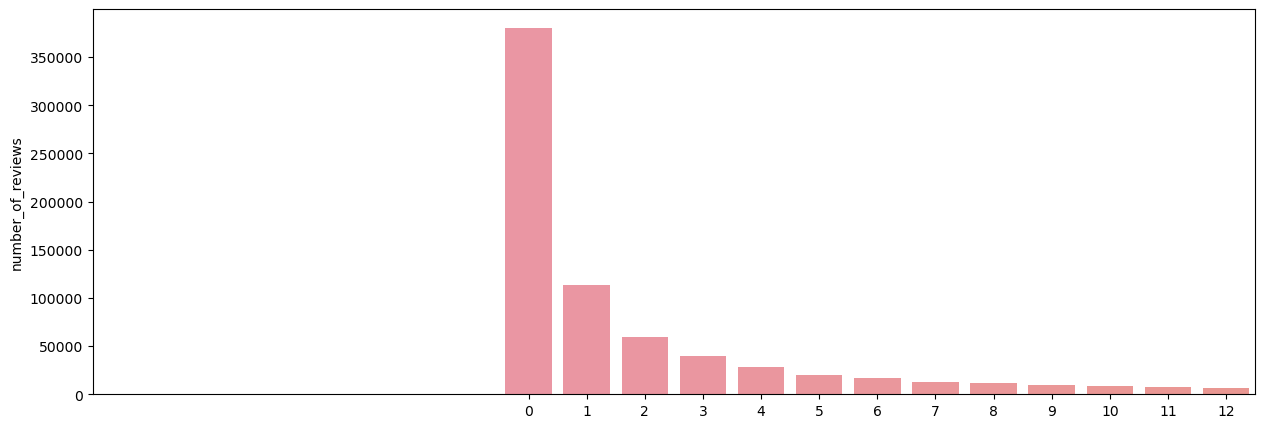

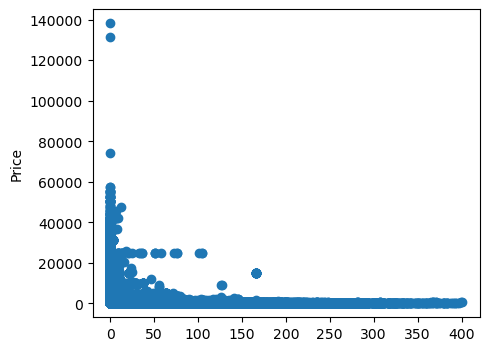

In [112]:
diagrama_caixa(base_airbnb['number_of_reviews'])
graf_barra(base_airbnb['number_of_reviews'])
scatter_plot(base_airbnb['number_of_reviews'])

Aqui tem um caso particularmente duvidoso .

Se excluir os outliers, será excluido as pessoas que tem a maior quantidade de reviews (o que normalmente são os hosts que têm mais aluguel). 

Pensando no objetivo, se um imovel está sendo colocado para ser alugado pela primeira vez, certamente nao tem review nenhum . 
Então talvez tirar essa característica da análise pode na verdade acabar ajudando.

Particularmente tenho dúvida se essa característica deveria impactar ou não o preço final

In [113]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)

# Váriaveis categóricas

## property_type

Apartment                 663183
House                      71073
Condominium                35576
Serviced apartment         18692
Loft                       15501
Bed and breakfast           5771
Hostel                      4670
Guest suite                 4291
Other                       2835
Guesthouse                  2678
Villa                       2393
Townhouse                   1391
Aparthotel                  1348
Hotel                       1331
Boutique hotel               842
Boat                         510
Chalet                       509
Earth house                  488
Tiny house                   416
Cottage                      306
Casa particular (Cuba)       302
Bungalow                     216
Dorm                         196
Nature lodge                 131
Cabin                        114
Castle                       106
Campsite                      55
Island                        54
Treehouse                     51
Resort                        36
Camper/RV 

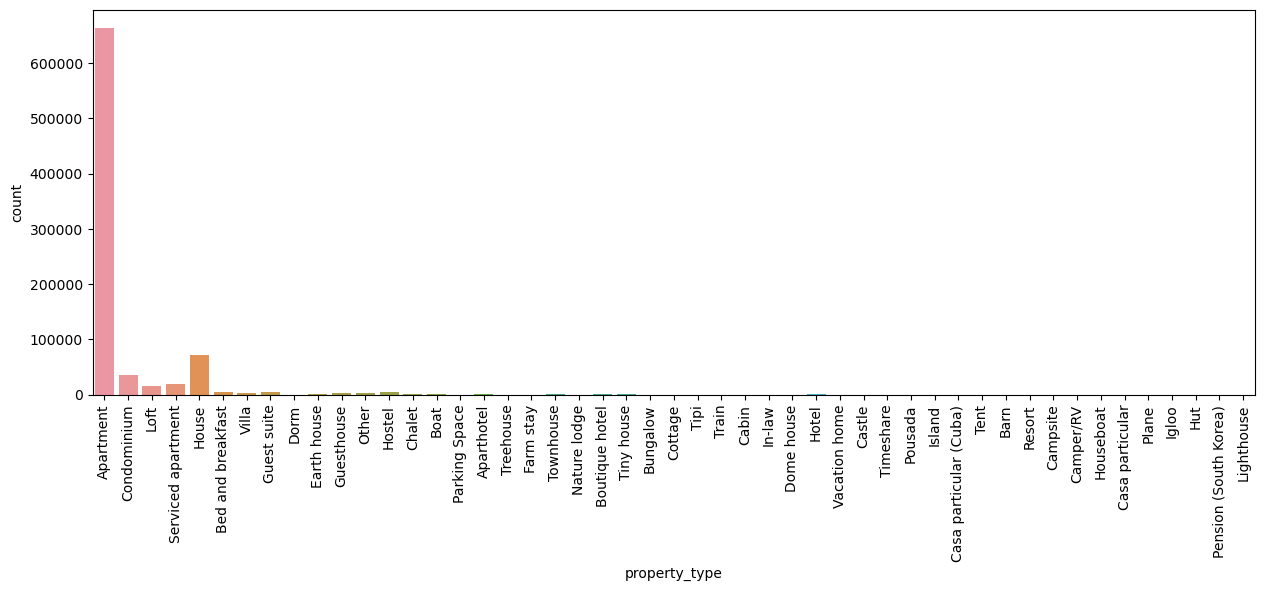

In [114]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Neste caso o tratamento será diferente, não será analisar e excluir outliers e sim agrupar devido a alta cardinalidade dessa variavel, o que pode afetar a interpretação dos resultados.

Será agrupado os tipos com menos que 2000 dados

['Townhouse', 'Aparthotel', 'Hotel', 'Boutique hotel', 'Boat', 'Chalet', 'Earth house', 'Tiny house', 'Cottage', 'Casa particular (Cuba)', 'Bungalow', 'Dorm', 'Nature lodge', 'Cabin', 'Castle', 'Campsite', 'Island', 'Treehouse', 'Resort', 'Camper/RV', 'Tent', 'Vacation home', 'Tipi', 'Houseboat', 'Farm stay', 'Hut', 'Barn', 'Pousada', 'Dome house', 'Parking Space', 'In-law', 'Igloo', 'Train', 'Casa particular', 'Timeshare', 'Pension (South Korea)', 'Plane', 'Lighthouse']
Apartment             663183
House                  71073
Condominium            35576
Serviced apartment     18692
Loft                   15501
Outros                  8638
Bed and breakfast       5771
Hostel                  4670
Guest suite             4291
Other                   2835
Guesthouse              2678
Villa                   2393
Name: property_type, dtype: int64


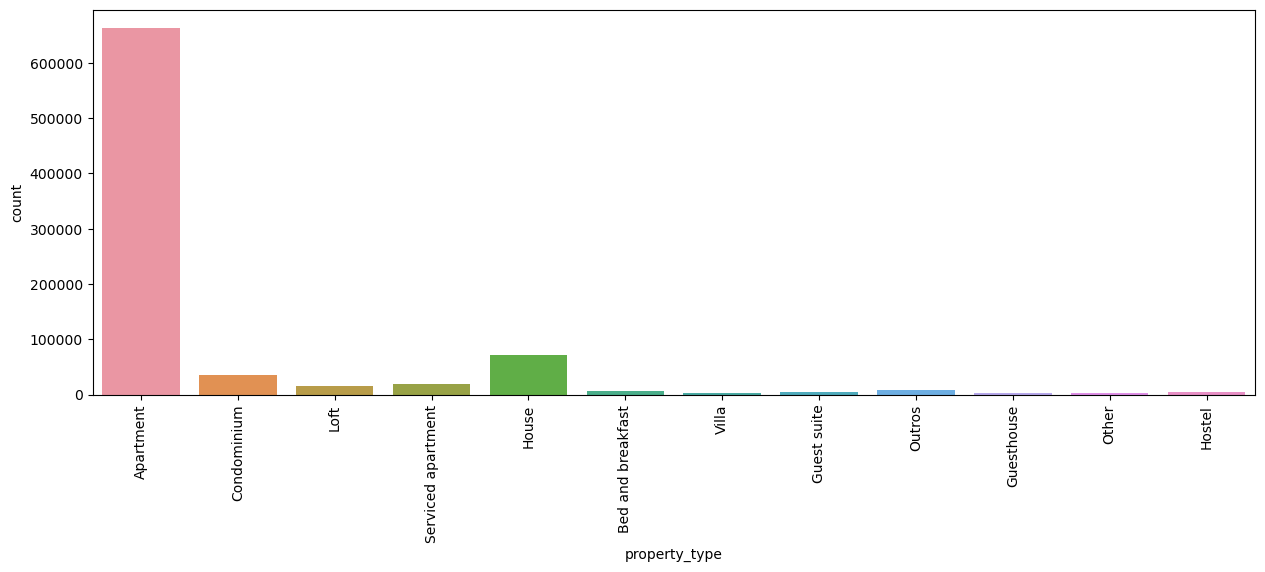

In [115]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type'] ==tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

## room_type
   - Tipos de quarto

Essa feature parece bem distribuida, não será feito nenhum tratamento 

Entire home/apt    598623
Private room       216021
Shared room         18369
Hotel room           2288
Name: room_type, dtype: int64


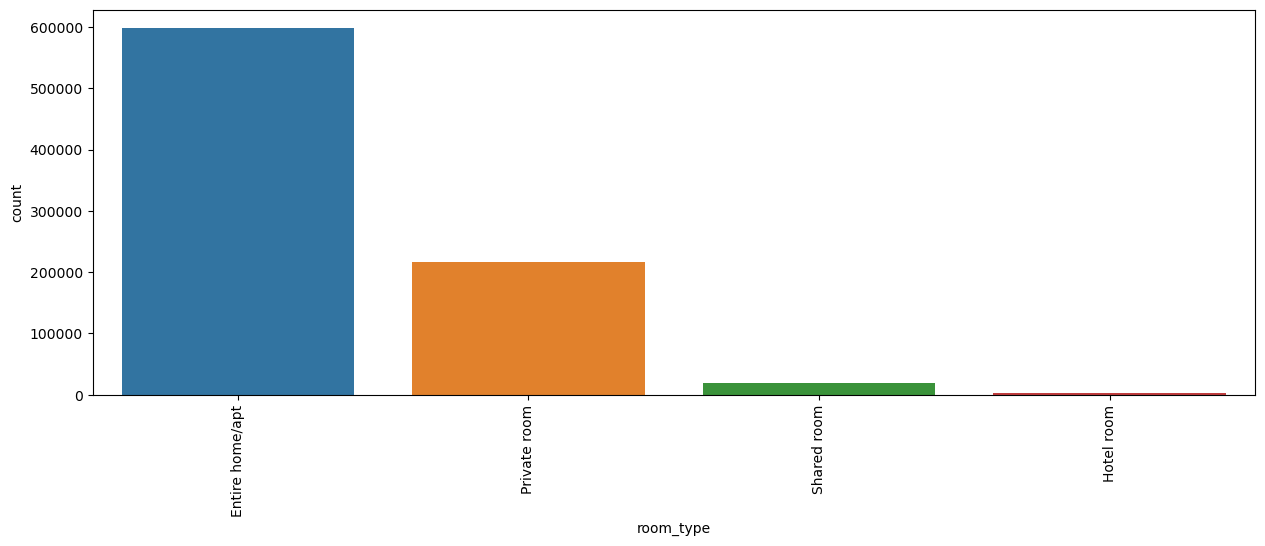

In [116]:
print(base_airbnb['room_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='room_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

## bed_type
   - Tipos de cama

Real Bed         822284
Pull-out Sofa      8857
Futon              2050
Airbed             1452
Couch               658
Name: bed_type, dtype: int64


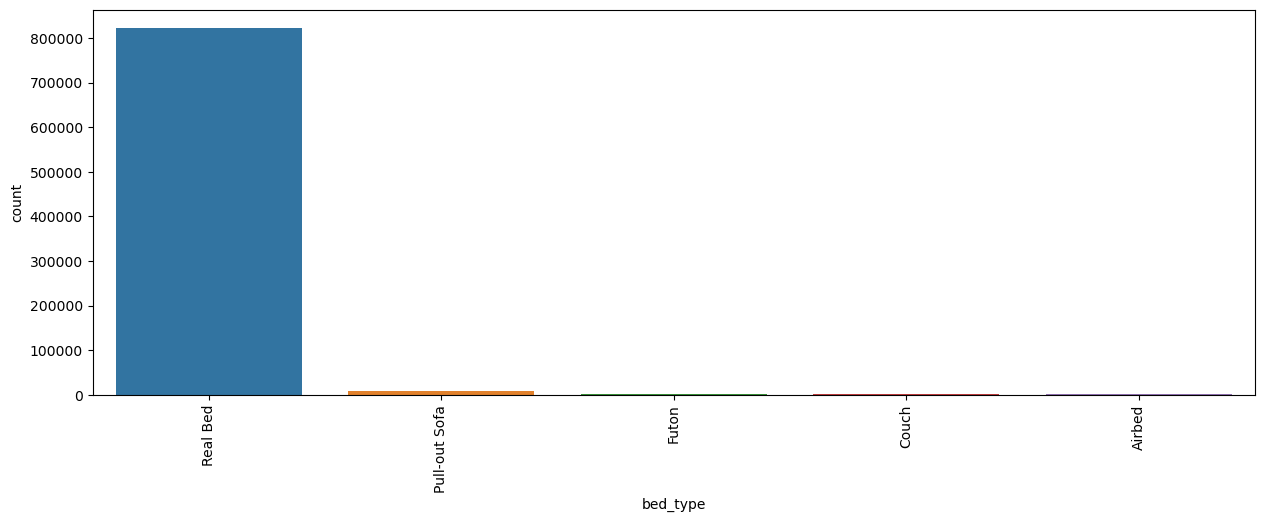

In [117]:
print(base_airbnb['bed_type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Nesse caso tambem será agrupado, tem um tipo apenas predominante .

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    822284
Outros       13017
Name: bed_type, dtype: int64


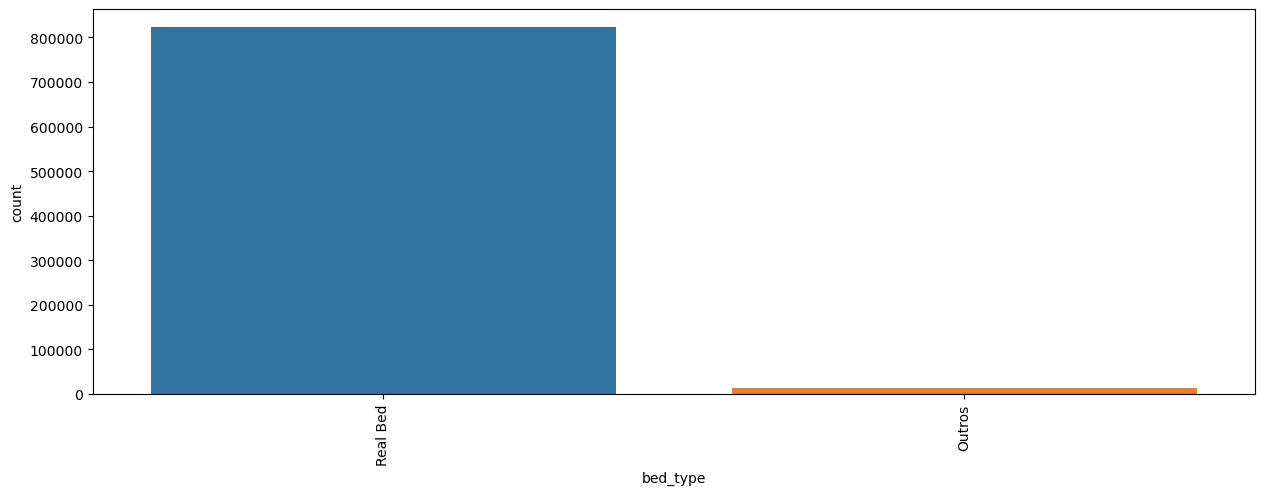

In [118]:
tabela_bed = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed.index:
    if tabela_bed[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

## cancellation_policy
   - Politica de cancelamento

flexible                       348079
strict_14_with_grace_period    319956
moderate                       140681
strict                          15602
super_strict_60                  8056
super_strict_30                  2927
Name: cancellation_policy, dtype: int64


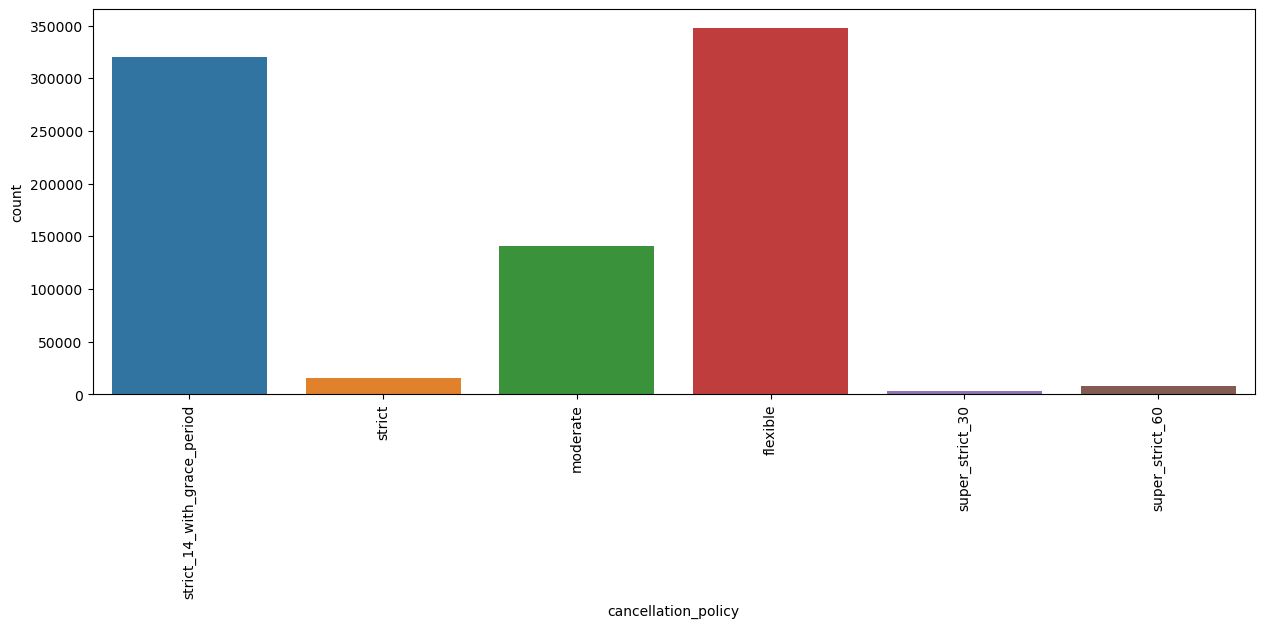

In [119]:
print(base_airbnb['cancellation_policy'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

Essa feature tambem poderia ser agrupada mas olhando para o modelo de negocio me parece uma variavel importane quando se trata de alugar um imovel , variados tipos de politicas de cancelamento é bem comum .

##  amenities 
   - Comodidades do imovel

Como temos uma diversidade muito grande de amenities e, às vezes, as mesmas amenities podem ser escritas de forma diferente, aqui será avaliado a quantidade de amenities como o parâmetro.

A quantidade de comodidade que um imovel tem sempre é muito relevante para o preço, entao serão mantidos todos os valores. Visto que apos a alteraçao passa a ser uma variavel numerica .

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


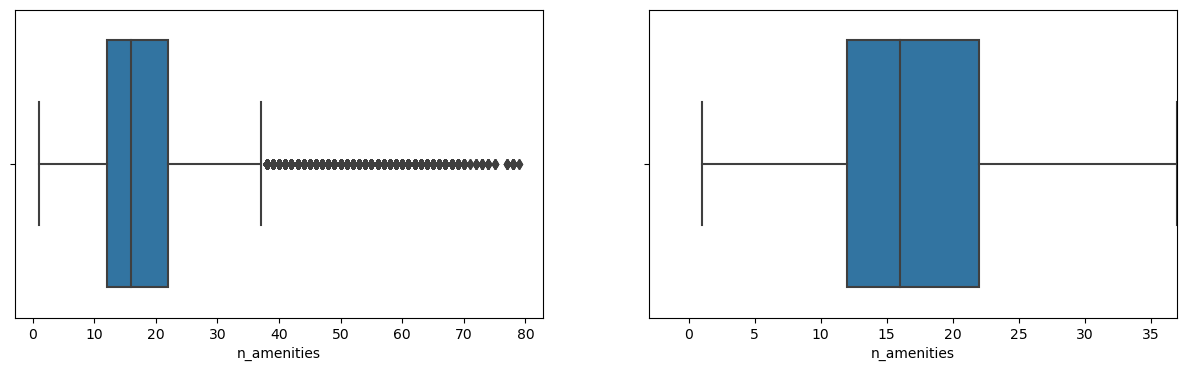

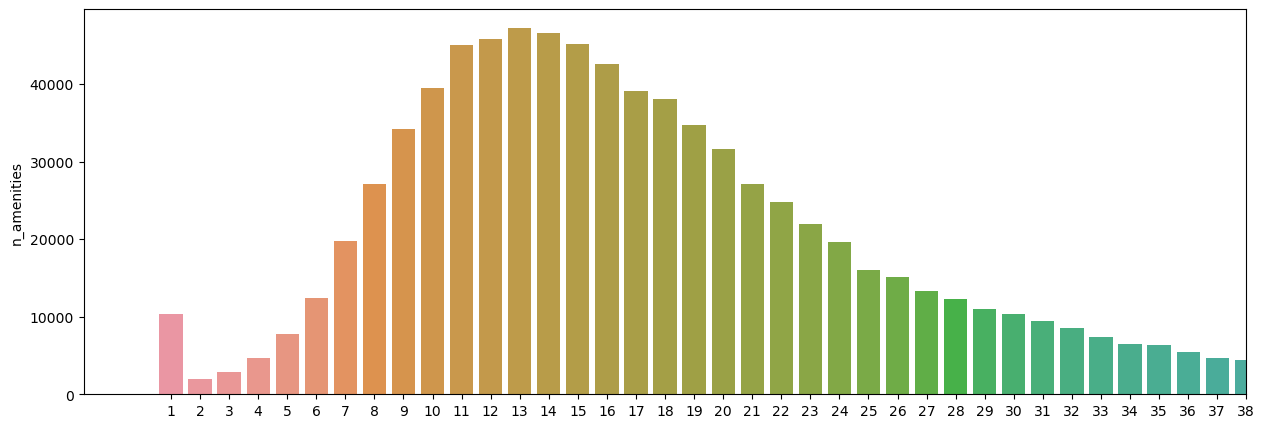

In [120]:
print(base_airbnb['amenities'].iloc[1].split(','))          #separa as palavras e faz a contagem delas
print(len(base_airbnb['amenities'].iloc[1].split(',')))

base_airbnb['n_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)   #nova coluna apartir da quantidade da anterior
base_airbnb = base_airbnb.drop('amenities', axis=1)                

diagrama_caixa(base_airbnb['n_amenities'])
graf_barra(base_airbnb['n_amenities'])

# Encoding

Ajustar as features para facilitar o trabalho do modelo (features de categoria, true e false, etc.)

- Features de Valores True ou False, substituir True por 1 e False por 0.
- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies
- Remover as features que foram utilizadas apenas para a análise, não serão necessarias para o modelo. (host_id, nome_host, host_since)

In [121]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
df = base_airbnb.copy()
for coluna in colunas_tf:
    df.loc[df[coluna]=='t', coluna] = 1
    df.loc[df[coluna]=='f', coluna] = 0

In [122]:
df = df.drop(['host_id', 'host_name', 'host_since'], axis=1)
# df.head(4)

In [123]:
colunas_categorias = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
df = pd.get_dummies(data=df, columns=colunas_categorias)
display(df.head(6))

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,extra_people,minimum_nights,instant_bookable,is_business_travel_ready,ano,mes,neighbourhood,n_amenities,property_type_Apartment,property_type_Bed and breakfast,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Outros,property_type_Serviced apartment,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,0,1.0,-22.946854,-43.182737,4,1.0,0.0,2.0,133.0,1025.000000,34.0,60,0,0,2018,4,Botafogo,11,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,0.000000,51.0,4,1,0,2018,4,Copacabana,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,1.0,-22.985698,-43.201935,2,1.0,1.0,1.0,222.0,851.000000,215.0,3,0,0,2018,4,Ipanema,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,1000.000000,45.0,4,0,0,2018,4,Copacabana,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,1179.685425,68.0,2,1,0,2018,4,Ipanema,16,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,856.000000,86.0,2,0,0,2018,4,Ipanema,30,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


                 Salvar a base de dados. Iniciar a execução do modelo em outro notebook.

In [124]:
df.to_csv('dados_analisados.csv', index=False)